In [1]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits
from astropy import constants
from astropy import units
from collections import OrderedDict

from matplotlib.ticker import NullFormatter  # useful for `logit` scale
from astropy.time import Time

from astropy.stats import LombScargle
plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='svg'
#%config InlineBackend.figure_format='retina'

# data

In [2]:
data_allwise_epoch=pd.read_csv('/Users/brettlv/Downloads/wise_cl/NGC1566_multi_epoch.csv')
data_neowise=pd.read_csv('/Users/brettlv/Downloads/wise_cl/NGC1566_neo.csv')

data_xrt_fit_NGC1566 = pd.read_table("/Users/brettlv/Downloads/wise_cl/xrt_fit_result/NGC1566_xrt_fit.txt",delimiter='\s+',header=0)  


data_ubb_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_ubb_sum.csv",delimiter='|',header=0)  
data_um2_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_um2_sum.csv",delimiter='|',header=0)  


data_uuu_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uuu_sum.csv",delimiter='|',header=0)  
data_uvv_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uvv_sum.csv",delimiter='|',header=0)  

data_uw1_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uw1_sum.csv",delimiter='|',header=0)  
data_uw2_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/wise_cl/fig/NGC1566_uw2_sum.csv",delimiter='|',header=0)  


data_ASAS_NGC1566 = pd.read_csv("/Users/brettlv/Downloads/NGC1566/AP36757554_ASASSN-V J042000.52-545616.7 (65.00215, -54.93797) .csv",header=0) 
data_ASAS_NGC1566['hmjd']= data_ASAS_NGC1566['hjd']- 2400000.5


/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: read_table is deprecated, use read_csv instead.


In [ ]:
data_xrt_fit_NGC1566.columns

## good fit

In [3]:
data_xrt_goodfit_NGC1566=data_xrt_fit_NGC1566[data_xrt_fit_NGC1566['chi']<1.5]
data_xrt_goodfit_NGC1566=data_xrt_goodfit_NGC1566[data_xrt_goodfit_NGC1566['chi']>0.7]

data_xrt_goodfit_NGC1566

## F-Gamma good-fit

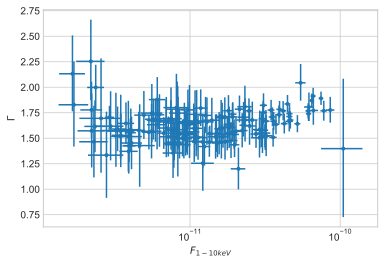

In [5]:
lower_error_f = data_xrt_goodfit_NGC1566['xflux_lo']#1-10keV
upper_error_f = data_xrt_goodfit_NGC1566['xflux_up']
lower_error_g = data_xrt_goodfit_NGC1566['gamma_lo']
upper_error_g = data_xrt_goodfit_NGC1566['gamma_up']
asymmetric_error_f = [lower_error_f, upper_error_f]
asymmetric_error_g = [lower_error_g, upper_error_g]
plt.xlabel(r'$F_{1-10keV}$')
plt.ylabel(r'$\Gamma$')
plt.semilogx()
plt.errorbar(data_xrt_goodfit_NGC1566['xflux'],data_xrt_goodfit_NGC1566['gamma'],xerr=asymmetric_error_f,yerr=asymmetric_error_g,fmt='.',label='F-gamma') 
plt.savefig('/Users/brettlv/Downloads/NGC1566/NGC1566_goodfit_F-Gamma.png',dpi=400)

In [6]:
data_xrt_goodfit_NGC1566.columns

Index(['obs_id', 'obs_time', 'gamma', 'gamma_lo', 'gamma_up', 'xflux',
       'xflux_lo', 'xflux_up', 'chi'],
      dtype='object')

In [16]:
import plotly_express as px
px.scatter?

In [14]:

import plotly_express as px

fig = px.scatter(data_xrt_goodfit_NGC1566, x='xflux',error_x='xflux_up',
                 error_x_minus='xflux_lo',y='gamma',error_y='gamma_up',error_y_minus='gamma_lo',
                 hover_name="obs_time",hover_data=['obs_time','chi','obs_id'],
                 size_max=15,color='obs_time')


fig.update_xaxes(tickformat= "0.1e",nticks=4,type="log",title_text="flux")
fig.update_yaxes(tickformat= "0.2f",nticks=10,type="linear",title_text="gamma")
fig.update_layout(title_text="", width = 800,height = 600)
#fig.update_xaxes(range=[np.log10(2e-4),np.log10(1e-2)])
#fig.update_yaxes(range=[1.0,2.5])
fig.show()
#fig.write_image('xray-paper-g-eddrate.gif')
#fig.write_image('xray-paper-g-eddrate.png')
fig.write_html('/Users/brettlv/Downloads/NGC1566/g-f-with-time.html')

In [15]:

import plotly_express as px

fig = px.scatter(data_xrt_goodfit_NGC1566, x='xflux',error_x='xflux_up',
                 error_x_minus='xflux_lo',y='gamma',error_y='gamma_up',error_y_minus='gamma_lo',
                 hover_name="obs_time",hover_data=['obs_time','chi','obs_id'],
                 size_max=15,color='obs_time',animation='obs_time')


fig.update_xaxes(tickformat= "0.1e",nticks=4,type="log",title_text="flux")
fig.update_yaxes(tickformat= "0.2f",nticks=10,type="linear",title_text="gamma")
fig.update_layout(title_text="", width = 800,height = 600)
#fig.update_xaxes(range=[np.log10(2e-4),np.log10(1e-2)])
#fig.update_yaxes(range=[1.0,2.5])
fig.show()
#fig.write_image('xray-paper-g-eddrate.gif')
#fig.write_image('xray-paper-g-eddrate.png')
fig.write_html('/Users/brettlv/Downloads/NGC1566/g-f-with-time.html')

TypeError: scatter() got an unexpected keyword argument 'animation'

A(E) \prop E^{-\Gamma}
F_v \prop v^{-\alpha}
\Gamma=\alpha+1

## XRT_good_fit

In [ ]:
v_1keV=2.418e17 #Hz
alpha_goodfit=data_xrt_goodfit_NGC1566['gamma']-1

data_xrt_goodfit_NGC1566['F_{1keV}']=data_xrt_goodfit_NGC1566['xflux']*(1-alpha_goodfit)/(10**(1-alpha_goodfit)-1)/v_1keV
data_xrt_goodfit_NGC1566['F_{2keV}']=2**(-alpha_goodfit)*data_xrt_goodfit_NGC1566['F_{1keV}']
data_xrt_goodfit_NGC1566['F_{4keV}']=4**(-alpha_goodfit)*data_xrt_goodfit_NGC1566['F_{1keV}']
data_xrt_goodfit_NGC1566['F_{6keV}']=6**(-alpha_goodfit)*data_xrt_goodfit_NGC1566['F_{1keV}']
data_xrt_goodfit_NGC1566['F_{8keV}']=8**(-alpha_goodfit)*data_xrt_goodfit_NGC1566['F_{1keV}']
data_xrt_goodfit_NGC1566['F_{10keV}']=10**(-alpha_goodfit)*data_xrt_goodfit_NGC1566['F_{1keV}']

In [ ]:
data_xrt_goodfit_NGC1566.columns

alpha=gamma-1

## cal_mono_flux

In [ ]:
v2=k*v1
F_{v}=m*v**(-gamma)
F_{v1}=F_{v1-v2}*(1-gamma)/(k**(1-gamma)-1)/v2

In [ ]:
F_{2keV}=F_{2-10keV}*(1-gamma)/(5**(1-g)-1)/v_{2keV}

In [ ]:
F_{1keV}=F_{1-10keV}*(1-gamma)/(10**(1-g)-1)/v_{1keV}

F_{2keV}=2**(-g)*F_{1keV}



np.sum(data_xrt_goodfit_NGC1566[data_xrt_goodfit_NGC1566.columns[2]]==1.0)

## ASAS-SN -48.8

In [ ]:
data_ASAS_NGC1566['flux']=(data_ASAS_NGC1566['flux (mJy)']-48.8)*1.0e-26*1.0e-3*1.0e7*1.0e-4

In [ ]:
for i,j in enumerate(data_ubb_NGC1566.columns):
    print(i,j)

## UV

In [ ]:
UV_namelist=['v','b','u','uvw1','uvm2','uvw2']
UV_datalist=[data_uvv_NGC1566,data_ubb_NGC1566,data_uuu_NGC1566,data_uw1_NGC1566,data_um2_NGC1566,data_uw2_NGC1566  ]
UV_lambda_list=[5.468E-07,4.392E-07,3.465E-07,2.600E-07,2.246E-07,1.928E-07]

In [ ]:
for i in UV_datalist:
    print(i.columns[6])
    i['flux']=i[i.columns[6]]*1.0e-26*1.0e-3*1.0e7*1.0e-4

## wise

In [ ]:
for i in range(4):
    name_mjd='mjd'
    name_band=data_allwise_epoch.columns[i*3+8]
    name_err=data_allwise_epoch.columns[i*3+9]
    print(name_mjd,name_band,name_err)
    data_band=data_allwise_epoch[data_allwise_epoch[name_mjd].notnull()] 
    data_band=data_band[data_band[name_band].notnull()]   
    mag_wise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    sed_wise_data=pd.DataFrame({'t':data_band[name_mjd],'logflux':(-48.6-data_band[name_band])/2.5,'logerr':data_band[name_err]/2.5},index=None,columns=['t','logflux','logerr'])
    sed_wise_data['flux']=10**(sed_wise_data['logflux'])
    sed_wise_data=sed_wise_data.sort_values('t')
    sed_wise_data.to_csv('/Users/brettlv/Downloads/NGC1566/sed_wise_multi_%s_data.csv'%name_band,index=False,header=False)      
    
data_neowise_select=data_neowise.loc[:, ['w1mpro', 'w1sigmpro',
         'w2mpro', 'w2sigmpro','w1mpro_allwise', 'w1sigmpro_allwise', 'w2mpro_allwise',
        'w2sigmpro_allwise', 'w3mpro_allwise', 'w3sigmpro_allwise',
        'w4mpro_allwise', 'w4sigmpro_allwise','mjd']]

for i in range(6):
    name_mjd='mjd'
    name_band=data_neowise_select.columns[i*2]
    data_band=data_neowise_select[data_neowise_select[name_mjd].notnull()]
    data_band=data_band[data_band[name_band].notnull()]
    name_err=data_neowise_select.columns[i*2+1]    
    print(name_mjd,name_band,name_err)    
    mag_neowise_data=pd.DataFrame({'t':data_band[name_mjd],'flux':data_band[name_band],'err':data_band[name_err]},index=None,columns=['t','flux','err'])
    sed_neowise_data=pd.DataFrame({'t':data_band[name_mjd],'logflux':(-48.6-data_band[name_band])/2.5,'logerr':data_band[name_err]/2.5},index=None,columns=['t','logflux','logerr'])    
    sed_neowise_data['flux']=10**(sed_neowise_data['logflux'])
    sed_neowise_data=sed_neowise_data.sort_values('t')
    sed_neowise_data.to_csv('/Users/brettlv/Downloads/NGC1566/sed_neowise_%s_data.csv'%name_band,index=False,header=False)

In [ ]:
print(data_xrt_goodfit_NGC1566.columns)

# get sed data

data_xrt_goodfit_NGC1566['obs_time']

for l in UV_lambda_list:
    v_i=(constants.c/l/units.m).to(units.Hz).value
    print(v_i)

for i in data_xrt_goodfit_NGC1566['obs_time']:
    print(i)

In [ ]:
sed_neowise_w1mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/neo-sed/sed_neowise_w1mpro_data.csv',header=None)
sed_neowise_w2mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/neo-sed/sed_neowise_w2mpro_data.csv',header=None)

sed_neowise_w3mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/neo-sed/sed_neowise_w3mpro_allwise_data.csv',header=None)
sed_neowise_w4mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/neo-sed/sed_neowise_w4mpro_allwise_data.csv',header=None)


sed_multiwise_w1mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/multi-sed/sed_wise_multi_w1mpro_ep_data.csv',header=None)
sed_multiwise_w2mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/multi-sed/sed_wise_multi_w2mpro_ep_data.csv',header=None)
sed_multiwise_w3mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/multi-sed/sed_wise_multi_w3mpro_ep_data.csv',header=None)
sed_multiwise_w4mpro_data=pd.read_csv('/Users/brettlv/Downloads/NGC1566/multi-sed/sed_wise_multi_w4mpro_ep_data.csv',header=None)




ls /Users/brettlv/Downloads/NGC1566/neo-sed/
ls /Users/brettlv/Downloads/NGC1566/multi-sed/

In [ ]:
neowise_namelist=['w1mpro','w2mpro','w3mpro_allwise','w4mpro_allwise']
neowise_datalist=[sed_neowise_w1mpro_data,sed_neowise_w2mpro_data,sed_neowise_w3mpro_data,sed_neowise_w4mpro_data]
multiwise_namelist=['w1mpro_ep','w2mpro_ep','w3mpro_ep','w4mpro_ep']
multiwise_datalist=[sed_multiwise_w1mpro_data,sed_multiwise_w2mpro_data,sed_multiwise_w3mpro_data,sed_multiwise_w4mpro_data]
wise_lambdalist=[3.400E-06,4.600E-06,1.200E-05,2.200E-05]

plot_wise_sed_time(mjd,neowise_namelist,neowise_datalist,wise_lambdalist)
plot_wise_sed_time(mjd,multiwise_namelist,multiwise_datalist,wise_lambdalist)

In [ ]:
def plot_mjd_sed(mjd,marker,color):
    plot_wise_sed_time(mjd,neowise_namelist,neowise_datalist,wise_lambdalist,marker,color)
    plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list,marker,color)
    plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566,marker,color)
    plot_wise_sed_time(mjd,multiwise_namelist,multiwise_datalist,wise_lambdalist,marker,color)

    

In [ ]:
markers_pd=['*','.','+','d','h','v','^','x','>','1','2','3','4','8','p','P','<','H','X','D','|','_']
colors_pd=['red','green','blue','yellow','lightblue','cyan','tan','gold','sandybrown','olivedrab','chartreuse','darkgreen','m','skyblue','violet','crimson','purple','magenta','lime','turquoise','lightcyan','teal','indigo']

## plot_vFv-v

In [ ]:
mjd_list=[54446,55370,55798,55868,58338,58465,58483,59689]
marker_dict = dict(zip(mjd_list, markers_pd[:len(mjd_list)]))
color_dict=dict(zip(mjd_list, colors_pd[:len(mjd_list)]))

In [ ]:
def plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566,marker,color='r'):
    mjd_near_i=np.argmin(abs(data_xrt_goodfit_NGC1566['obs_time']-mjd))
    mjd_near=data_xrt_goodfit_NGC1566['obs_time'][mjd_near_i]
    if abs(mjd_near-mjd)<5.0:
        print('xrt',mjd_near)
        for i in range(5):
            #print(i+1,data_xrt_goodfit_NGC1566.columns[i+10])
            v_i=(i+1)*2*v_1keV
            f_v_i=data_xrt_goodfit_NGC1566[data_xrt_goodfit_NGC1566.columns[i+10]][mjd_near_i]
            axs.scatter(v_i,v_i*f_v_i,marker=marker,label=mjd,color=color)
            #axs.text(v_i,v_i*f_v_i,str((i+1)*2))
            
            
def plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list,marker,color='r'):
    for i,j,l in zip(UV_namelist,UV_datalist,UV_lambda_list):
        mjd_near_i=np.argmin(abs(j[j.columns[3]]-mjd))
        mjd_near=j[j.columns[3]][mjd_near_i]           
        if abs(mjd_near-mjd)<5.0:
            print(i,mjd_near)
            v_i=(constants.c/l/units.m).to(units.Hz).value
            f_v_i=j[j.columns[-1]][mjd_near_i]  
            axs.scatter(v_i,v_i*f_v_i,marker=marker,label=mjd,color=color) 
            #axs.text(v_i,v_i*f_v_i,i)

def plot_wise_sed_time(mjd,wise_namelist,wise_datalist,wise_lambdalist,marker,color='r'):
    for i,j,l in zip(wise_namelist,wise_datalist,wise_lambdalist):
        mjd_near_i=np.argmin(abs(j[j.columns[0]]-mjd))
        mjd_near=j[j.columns[0]][mjd_near_i]           
        if abs(mjd_near-mjd)<100:
            print(i,mjd_near)
            v_i=(constants.c/l/units.m).to(units.Hz).value
            f_v_i=j[j.columns[-1]][mjd_near_i]
            print("%10.3e"% (v_i),"%10.3e"% (f_v_i))
            axs.scatter(v_i,v_i*f_v_i,marker=marker,label=mjd,color=color) 
            #axs.text(v_i,v_i*f_v_i,i[:2])
            
            

fig, axs = plt.subplots(1, 1,figsize=(16,9))
axs.set_title('NGC1566_SED')
axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$\nu F_{\nu}$ ($erg s^{-1} cm^{-2} Hz^{-1}$)')
axs.set_xlabel('Hz')

for i in mjd_list:
    marker=marker_dict[i]
    color=color_dict[i]
    plot_mjd_sed(i,marker,color)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 0.7),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/NGC1566_sed.png',dpi=400)

fig, axs = plt.subplots(1, 1,figsize=(8,5))
axs.set_title('NGC1566_SED')

axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$\nu F_{\nu}$ ($erg s^{-1} cm^{-2} Hz^{-1}$)')
axs.set_xlabel('Hz')

mjd=58123
plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list)
plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.5),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)


In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
axs.set_title('NGC1566_SED')

axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$\nu F_{\nu}$ ($erg s^{-1} cm^{-2} Hz^{-1}$)')
axs.set_xlabel('Hz')

mjd=58821
plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list)
plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.5),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)


In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
axs.set_title('NGC1566_SED')

axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$\nu F_{\nu}$ ($erg s^{-1} cm^{-2} Hz^{-1}$)')
axs.set_xlabel('Hz')

mjd=58483
plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list)
plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.5),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)


In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(8,5))
axs.set_title('NGC1566_SED')

axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$\nu F_{\nu}$ ($erg s^{-1} cm^{-2} Hz^{-1}$)')
axs.set_xlabel('Hz')

mjd=58695
plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list)
plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.0, 0.5),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)


## plot_2_fv-v

In [ ]:
def plot_xrt_sed_time(mjd,data_xrt_goodfit_NGC1566,marker,color='r'):
    mjd_near_i=np.argmin(abs(data_xrt_goodfit_NGC1566['obs_time']-mjd))
    mjd_near=data_xrt_goodfit_NGC1566['obs_time'][mjd_near_i]
    if abs(mjd_near-mjd)<5.0:
        print('xrt',mjd_near)
        for i in range(5):
            #print(i+1,data_xrt_goodfit_NGC1566.columns[i+10])
            v_i=(i+1)*2*v_1keV
            f_v_i=data_xrt_goodfit_NGC1566[data_xrt_goodfit_NGC1566.columns[i+10]][mjd_near_i]
            axs.scatter(v_i,f_v_i*1.0e19,marker=marker,label=mjd,color=color)
            #axs.text(v_i,v_i*f_v_i,str((i+1)*2))
            
            
def plot_uvot_sed_time(mjd,UV_namelist,UV_datalist,UV_lambda_list,marker,color='r'):
    for i,j,l in zip(UV_namelist,UV_datalist,UV_lambda_list):
        mjd_near_i=np.argmin(abs(j[j.columns[3]]-mjd))
        mjd_near=j[j.columns[3]][mjd_near_i]           
        if abs(mjd_near-mjd)<5.0:
            print(i,mjd_near)
            v_i=(constants.c/l/units.m).to(units.Hz).value
            f_v_i=j[j.columns[-1]][mjd_near_i]  
            axs.scatter(v_i,f_v_i*1.0e19,marker=marker,label=mjd,color=color) 
            #axs.text(v_i,v_i*f_v_i,i)

def plot_wise_sed_time(mjd,wise_namelist,wise_datalist,wise_lambdalist,marker,color='r'):
    for i,j,l in zip(wise_namelist,wise_datalist,wise_lambdalist):
        mjd_near_i=np.argmin(abs(j[j.columns[0]]-mjd))
        mjd_near=j[j.columns[0]][mjd_near_i]           
        if abs(mjd_near-mjd)<100:
            print(i,mjd_near)
            v_i=(constants.c/l/units.m).to(units.Hz).value
            f_v_i=j[j.columns[-1]][mjd_near_i]
            print("%10.3e"% (v_i),"%10.3e"% (f_v_i))
            axs.scatter(v_i,f_v_i*1.0e19,marker=marker,label=mjd,color=color) 
            #axs.text(v_i,v_i*f_v_i,i[:2])
            
fig, axs = plt.subplots(1, 1,figsize=(16,9))
axs.set_title('NGC1566_SED')


axs.semilogy()
axs.semilogx()
axs.set_ylabel(r'$ F_{\nu}$ ($Jy$)')
axs.set_xlabel('Hz')

for i in mjd_list:
    marker=marker_dict[i]
    color=color_dict[i]
    plot_mjd_sed(i,marker,color)
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))    
axs.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 0.7),ncol=1,loc='right')    
axs.grid(which='minor',ls='-.',alpha=0.3)
plt.tight_layout()
plt.savefig('/Users/brettlv/Downloads/NGC1566/NGC1566_sed_Jy.png',dpi=400)            